<a href="https://colab.research.google.com/github/SushmaChandrachar/Skin_Cancer_Detection/blob/main/Sushma_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Where all dataset is there
dataset_path = '/content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/'
print(dataset_path)


/content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/


### Importing all the important libraries

In [4]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
BATCH_SIZE = 32
img_height = 180
img_width = 180
num_classes = 9
epochs = 20

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
#train_ds = ##todo

In [9]:
def build_dataset(subset):
  return tf.keras.preprocessing.image_dataset_from_directory(
      data_dir_train,
      validation_split=.20,
      subset=subset,
      seed=123,
      image_size=(img_height,img_width),
      batch_size=BATCH_SIZE)

In [10]:
train_ds = build_dataset("training")
train_size = train_ds.cardinality().numpy()
normalization_layer = tf.keras.layers.Rescaling(1. / 255)
train_data = np.array(train_ds)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [11]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = build_dataset("validation")

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [12]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

class_names_val = val_ds.class_names
print(class_names_val)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

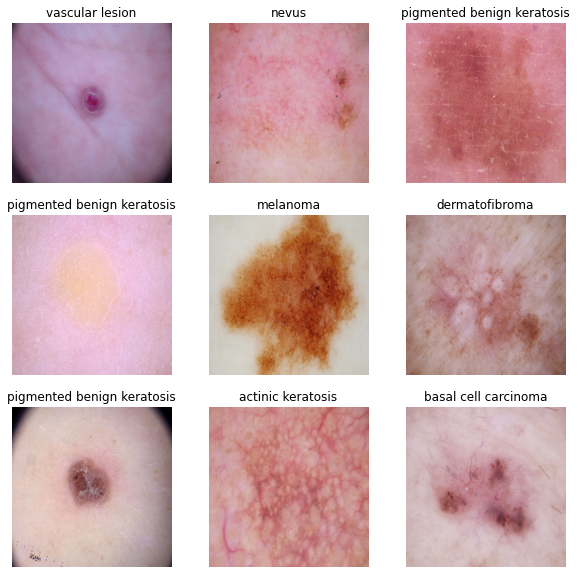

In [13]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

#image data visualization
plt.figure(figsize=(10, 10)) 
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1) 
    plt.imshow(images[i].numpy().astype("uint8")) 
    arr = labels[i].numpy().astype("uint8")
    #print(np.where(arr==1)[0][0])
    #plt.title(class_names[np.where(arr==1)[0][0]])
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
print(type(train_ds))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [25]:
### Your code goes here
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  #layers.Dense(1024, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [26]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
# View the summary of all layers
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 conv2d_13 (Conv2D)          (None, 180, 180, 16)      2320      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 conv2d_15 (Conv2D)          (None, 90, 90, 32)        9248      
                                                      

### Train the model

In [28]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 119s 2s/step - loss: 1.9176 - accuracy: 0.3013 - val_loss: 1.6095 - val_accuracy: 0.4720
Epoch 2/20
56/56 [==============================] - 2s 44ms/step - loss: 1.5822 - accuracy: 0.4319 - val_loss: 1.5904 - val_accuracy: 0.4810
Epoch 3/20
56/56 [==============================] - 2s 43ms/step - loss: 1.4467 - accuracy: 0.4911 - val_loss: 1.4617 - val_accuracy: 0.5302
Epoch 4/20
56/56 [==============================] - 2s 43ms/step - loss: 1.3599 - accuracy: 0.5167 - val_loss: 1.4302 - val_accuracy: 0.5280
Epoch 5/20
56/56 [==============================] - 2s 43ms/step - loss: 1.2116 - accuracy: 0.5709 - val_loss: 1.5554 - val_accuracy: 0.5347
Epoch 6/20
56/56 [==============================] - 2s 43ms/step - loss: 1.0798 - accuracy: 0.6239 - val_loss: 1.5168 - val_accuracy: 0.5145
Epoch 7/20
56/56 [==============================] - 2s 43ms/step - loss: 0.9318 - accuracy: 0.6747 - val_loss: 1.6696 - val_accuracy: 0.5145
Epoch 8/20
56

### Visualizing training results

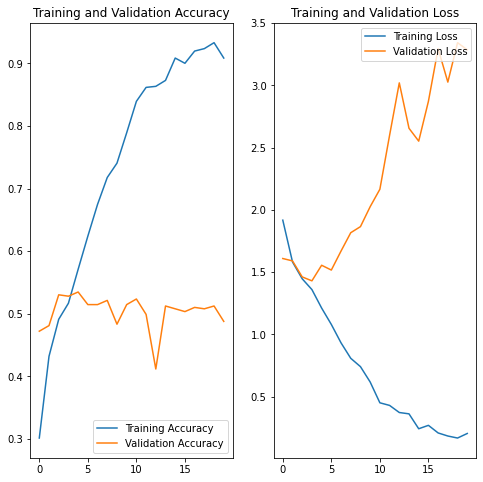

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**The validation accuracy is much lower as compared to training accuracy , hence thhe model is overfitting.**

training accuracy = 90% and validation accuracy = 49%

training accuracy = 78% and validation accuracy = 32%

In [35]:
#Data Augumentation using keras to overcome above overfitting

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(img_height, img_width),
  layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.4),
  layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3))
])

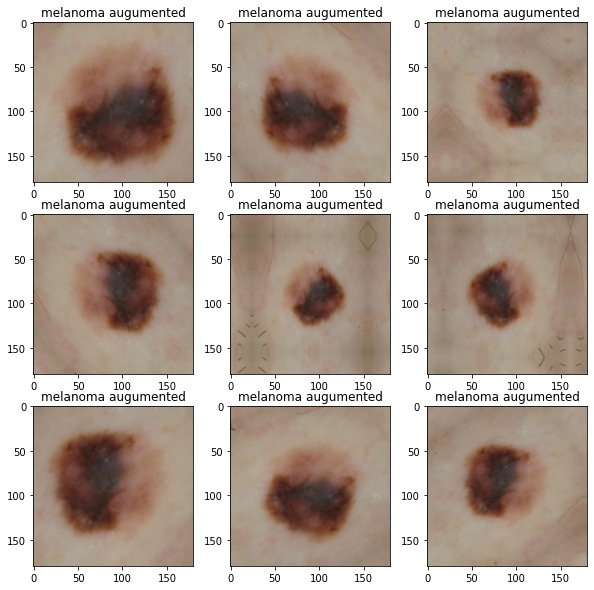

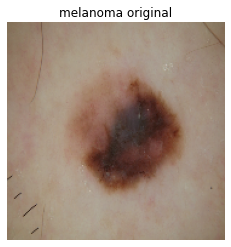

In [48]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
for image, label in train_ds.take(1):
  plt.figure(figsize=(10,10))
  for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0].numpy().astype("uint8"))
    #plt.imshow(augmented_image)
  #arr = label[i].numpy().astype("uint8")
    plt.title(class_names[label[0]] + ' augumented')
  #plt.axis("off")


  plt.figure(figsize=(4,4))
  #augmented_image = data_augmentation(resize_and_rescale(image[i]))
  #ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[0].numpy().astype("uint8"))
  #plt.imshow(augmented_image)
    #arr = label.numpy().astype("uint8")
    #plt.title(class_names[np.where(arr==1)[0][0]] + ' original')
  plt.title(class_names[label[0]] + ' original')
  plt.axis("off")




### Todo:
### Create the model, compile and train the model


In [49]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

In [58]:
### Your code goes here
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  #layers.Dense(1024, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(num_classes)
])

### Compiling the model

In [59]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [63]:
# View the summary of all layers
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_12 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 conv2d_29 (Conv2D)          (None, 180, 180, 16)      2320      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 90, 90, 32)        4640      
                                                     

### Training the model

In [61]:
## Your code goes here, note: train your model for 20 epochs

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 63ms/step - loss: 1.9389 - accuracy: 0.2790 - val_loss: 1.7719 - val_accuracy: 0.3691
Epoch 2/20
56/56 [==============================] - 3s 60ms/step - loss: 1.6934 - accuracy: 0.3739 - val_loss: 1.5442 - val_accuracy: 0.4452
Epoch 3/20
56/56 [==============================] - 3s 60ms/step - loss: 1.5728 - accuracy: 0.4576 - val_loss: 1.4803 - val_accuracy: 0.4765
Epoch 4/20
56/56 [==============================] - 3s 61ms/step - loss: 1.5662 - accuracy: 0.4660 - val_loss: 1.4250 - val_accuracy: 0.5101
Epoch 5/20
56/56 [==============================] - 3s 59ms/step - loss: 1.4227 - accuracy: 0.4950 - val_loss: 1.3846 - val_accuracy: 0.5101
Epoch 6/20
56/56 [==============================] - 3s 60ms/step - loss: 1.4415 - accuracy: 0.4922 - val_loss: 1.7332 - val_accuracy: 0.4004
Epoch 7/20
56/56 [==============================] - 3s 60ms/step - loss: 1.4561 - accuracy: 0.4883 - val_loss: 1.3894 - val_accuracy: 0.5235
Epoch 8/20
56

### Visualizing the results

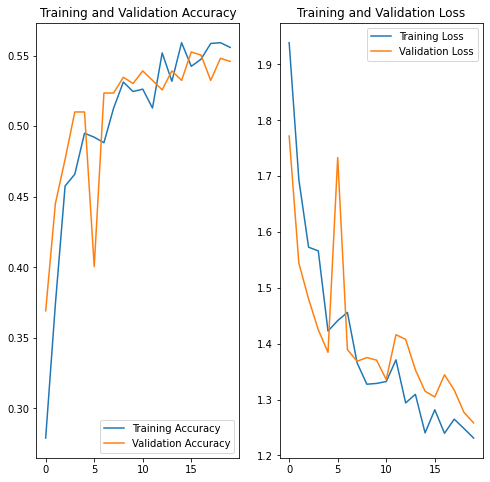

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**The validation accuracy is much closer to training accuracy , hence thhe model is not overfitting now.**

training accuracy = 55.6% and validation accuracy = 54.6%

**However the overall accuracy can be still improved , as the training accuracy is quite low, we can say it is underfitting now**


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [79]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
print(class_names)
class0 = pathlib.Path("/content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis")
a = len(list(class0.glob('*.jpg')))
print('class0 ',a, round(a/image_count_train*100,2),'%')
class1 = pathlib.Path("/content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma")
a = len(list(class1.glob('*.jpg')))
print('class1 ',a, round(a/image_count_train*100,2),'%')
class2 = pathlib.Path("/content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma")
a = len(list(class2.glob('*.jpg')))
print('class2 ',a, round(a/image_count_train*100,2),'%')
class3 = pathlib.Path("/content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma")
a = len(list(class3.glob('*.jpg')))
print('class3 ',a, round(a/image_count_train*100,2),'%')
class4 = pathlib.Path("/content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus")
a = len(list(class4.glob('*.jpg')))
print('class4 ',a, round(a/image_count_train*100,2),'%')
class5 = pathlib.Path("/content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis")
a = len(list(class5.glob('*.jpg')))
print('class5 ',a, round(a/image_count_train*100,2),'%')
class6 = pathlib.Path("/content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis")
a = len(list(class6.glob('*.jpg')))
print('class6 ',a, round(a/image_count_train*100,2),'%')
class7 = pathlib.Path("/content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma")
a = len(list(class7.glob('*.jpg')))
print('class7 ',a, round(a/image_count_train*100,2),'%')
class8 = pathlib.Path("/content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion")
a = len(list(class8.glob('*.jpg')))
print('class8 ',a, round(a/image_count_train*100,2),'%')

2239
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
class0  114 5.09 %
class1  376 16.79 %
class2  95 4.24 %
class3  438 19.56 %
class4  357 15.94 %
class5  462 20.63 %
class6  77 3.44 %
class7  181 8.08 %
class8  139 6.21 %


In [ ]:
!ls "/content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis"

#### - class6 -"seborrheic keratosis"  has the least number of samples
#### - classes such as (class5,class3, class1) pigmented benign keratosis , melanoma , basal cell carcinoma dominates the data in terms of proportionate number of samples.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [80]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [81]:
path_to_training_dataset="/content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F82204B3F10>: 100%|██████████| 500/500 [00:19<00:00, 25.62 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8234141640>: 100%|██████████| 500/500 [00:18<00:00, 27.43 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F82200FA160>: 100%|██████████| 500/500 [00:18<00:00, 27.05 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F8234141C70>: 100%|██████████| 500/500 [01:29<00:00,  5.57 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F82343DFAF0>: 100%|██████████| 500/500 [01:21<00:00,  6.12 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F822042F670>: 100%|██████████| 500/500 [00:18<00:00, 27.74 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F82202B0EB0>: 100%|██████████| 500/500 [00:42<00:00, 11.67 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F82CBC08430>: 100%|██████████| 500/500 [00:17<00:00, 27.81 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F82CBD39B20>: 100%|██████████| 500/500 [00:18<00:00, 26.66 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [96]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [109]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new
#os.path.join(data_dir_train, '*','output', '*.jpg')

#for i in data_dir_train.glob('/content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/*/output/*.jpg'):
#  print(i)

TypeError: ignored

In [110]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

TypeError: ignored

In [108]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

NameError: ignored

In [112]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

NameError: ignored

In [113]:
new_df['Label'].value_counts()

NameError: ignored

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [111]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [116]:
data_dir_train="/content/drive/My Drive/app/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [118]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [119]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  #layers.Dense(1024, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [120]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [121]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 33s 186ms/step - loss: 2.0067 - accuracy: 0.2526 - val_loss: 1.6116 - val_accuracy: 0.4143
Epoch 2/30
169/169 [==============================] - 34s 197ms/step - loss: 1.5729 - accuracy: 0.4006 - val_loss: 1.4204 - val_accuracy: 0.4566
Epoch 3/30
169/169 [==============================] - 31s 181ms/step - loss: 1.3907 - accuracy: 0.4811 - val_loss: 1.3284 - val_accuracy: 0.5033
Epoch 4/30
169/169 [==============================] - 31s 180ms/step - loss: 1.2296 - accuracy: 0.5386 - val_loss: 1.1598 - val_accuracy: 0.5702
Epoch 5/30
169/169 [==============================] - 31s 180ms/step - loss: 1.1449 - accuracy: 0.5783 - val_loss: 1.3118 - val_accuracy: 0.5353
Epoch 6/30
169/169 [==============================] - 32s 183ms/step - loss: 0.9275 - accuracy: 0.6636 - val_loss: 1.0419 - val_accuracy: 0.6229
Epoch 7/30
169/169 [==============================] - 31s 180ms/step - loss: 0.7829 - accuracy: 0.7187 - val_loss: 0.9198 - val_ac

#### **Todo:**  Visualize the model results

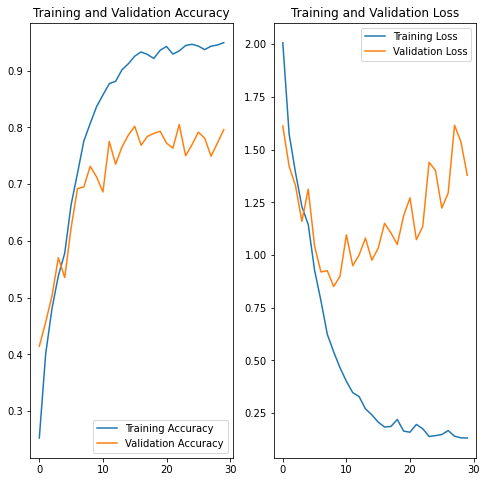

In [122]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



training accuracy = 94.5% and validation accuracy = 77.2%

**Class rebalance has helped in model to overcome underfitting, however now its slightly overfitting, hence adding few dropouts.**

In [126]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  #layers.Dense(1024, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [127]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 8s 45ms/step - loss: 2.1802 - accuracy: 0.1818 - val_loss: 1.9428 - val_accuracy: 0.2836
Epoch 2/30
169/169 [==============================] - 7s 44ms/step - loss: 1.8041 - accuracy: 0.3134 - val_loss: 1.7770 - val_accuracy: 0.3571
Epoch 3/30
169/169 [==============================] - 8s 44ms/step - loss: 1.6773 - accuracy: 0.3637 - val_loss: 1.5273 - val_accuracy: 0.4061
Epoch 4/30
169/169 [==============================] - 8s 44ms/step - loss: 1.5659 - accuracy: 0.4000 - val_loss: 1.4339 - val_accuracy: 0.4336
Epoch 5/30
169/169 [==============================] - 8s 44ms/step - loss: 1.5514 - accuracy: 0.3971 - val_loss: 1.4389 - val_accuracy: 0.4714
Epoch 6/30
169/169 [==============================] - 7s 44ms/step - loss: 1.4891 - accuracy: 0.4240 - val_loss: 1.3737 - val_accuracy: 0.4551
Epoch 7/30
169/169 [==============================] - 8s 45ms/step - loss: 1.4449 - accuracy: 0.4306 - val_loss: 1.4119 - val_accuracy: 0.4395

training accuracy = 81.6% and validation accuracy = 74.3%

**Overfitting is reduced now, though the accuracy has gone down a little bit, overfitting is not observed much in this model**